In [25]:
from random import shuffle
import glob

In [26]:
shuffle_data = True  # shuffle the addresses

hdf5_path = 'None.h5'  #Name your file # file path for the created .hdf5 file
cat_dog_train_path = 'None\*.jpg' #Path of dataset images # the original data path #here '*' is

# get all the image paths 
addrs = glob.glob(cat_dog_train_path)

# label the data as 0=cat, 1=dog
labels = [0 if 'non' in addr else 1 for addr in addrs] 

# shuffle data
if shuffle_data:
    c = list(zip(addrs, labels)) # use zip() to bind the images and labels together
    shuffle(c)
 
    (addrs, labels) = zip(*c)  # *c is used to separate all the tuples in the list c,  
                               # "addrs" then contains all the shuffled paths and 
                               # "labels" contains all the shuffled labels.
                               
# Divide the data into 80% for train and 20% for test
train_addrs = addrs[0:int(0.8*len(addrs))]
train_labels = labels[0:int(0.8*len(labels))]

test_addrs = addrs[int(0.8*len(addrs)):]
test_labels = labels[int(0.8*len(labels)):]

In [27]:
import numpy as np
import h5py

train_shape = (len(train_addrs), 64, 64, 3)
test_shape = (len(test_addrs), 64, 64, 3)

# open a hdf5 file and create earrays 
f = h5py.File(hdf5_path, mode='w')

# PIL.Image: the pixels range is 0-255,dtype is uint.
# matplotlib: the pixels range is 0-1,dtype is float.
f.create_dataset("train_img", train_shape, np.uint8)
f.create_dataset("test_img", test_shape, np.uint8)  

# the ".create_dataset" object is like a dictionary, the "train_labels" is the key. 
f.create_dataset("train_labels", (len(train_addrs),), np.uint8)
f["train_labels"][...] = train_labels

f.create_dataset("test_labels", (len(test_addrs),), np.uint8)
f["test_labels"][...] = test_labels



In [28]:
import cv2

# loop over train paths
for i in range(len(train_addrs)):
  
    if i % 1000 == 0 and i > 1:
        print ('Train data: {}/{}'.format(i, len(train_addrs)) )

    addr = train_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)# resize to (128,128)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 load images as BGR, convert it to RGB
    f["train_img"][i, ...] = img[None] 

# loop over test paths
for i in range(len(test_addrs)):

    if i % 1000 == 0 and i > 1:
        print ('Test data: {}/{}'.format(i, len(test_addrs)) )

    addr = test_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    f["test_img"][i, ...] = img[None]

    

f.close()

In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


In [31]:
f = h5py.File('elvis.h5', 'r')

In [32]:
list(f.keys())

['test_img', 'test_labels', 'train_img', 'train_labels']

In [33]:
dset = f['test_img']
dset1 = f['train_img']
dset2 = f['train_labels']
dset3 = f['test_labels']

In [34]:
list(f.keys())

['test_img', 'test_labels', 'train_img', 'train_labels']

In [35]:
dset

<HDF5 dataset "test_img": shape (40, 64, 64, 3), type "|u1">

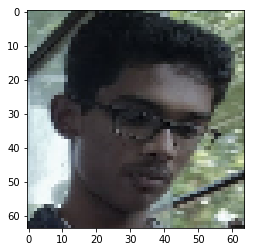

In [36]:
plt.imshow(dset[0])

In [37]:
dset3[0]

1